In [306]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [307]:
df=pd.read_csv('/content/Spaceship Titanic train.csv')

In [308]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [309]:
df['HomePlanet'].value_counts()

,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [310]:
df['CryoSleep'].value_counts()

,count
CryoSleep,
False,5439
True,3037


In [311]:
df['Cabin'].value_counts()

,count
Cabin,
G/734/S,8
B/11/S,7
F/1411/P,7
B/82/S,7
G/981/S,7
...,...
G/543/S,1
B/106/P,1
G/542/S,1


In [312]:
df['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [313]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [314]:
df.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


checking the distribution of the  numeric features

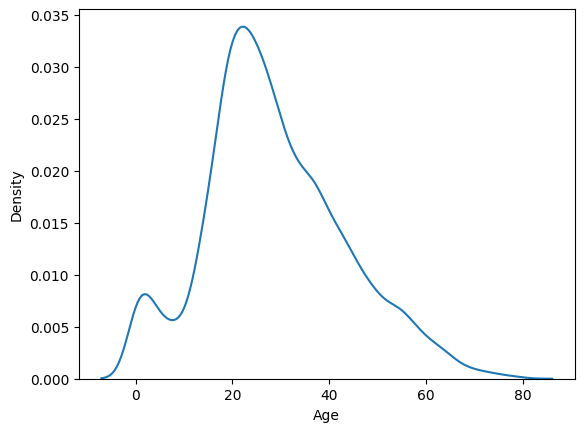

In [315]:
sns.kdeplot(df['Age'])
plt.show()

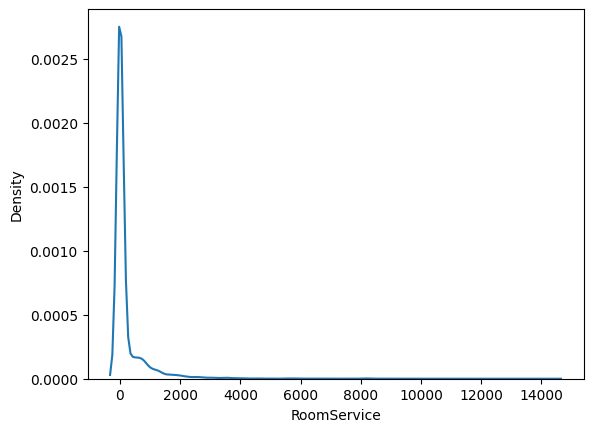

In [316]:
sns.kdeplot(df['RoomService'])
plt.show()

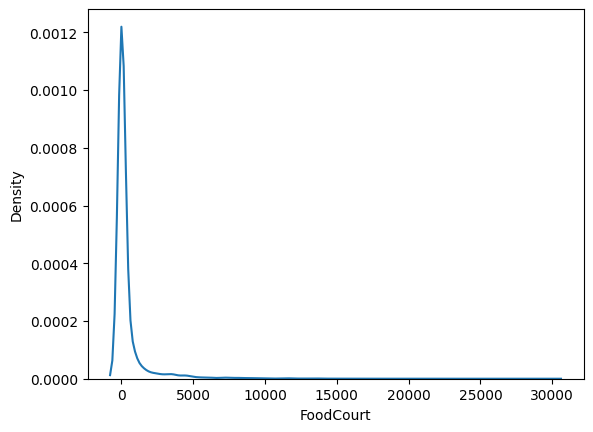

In [317]:
sns.kdeplot(df['FoodCourt'])
plt.show()

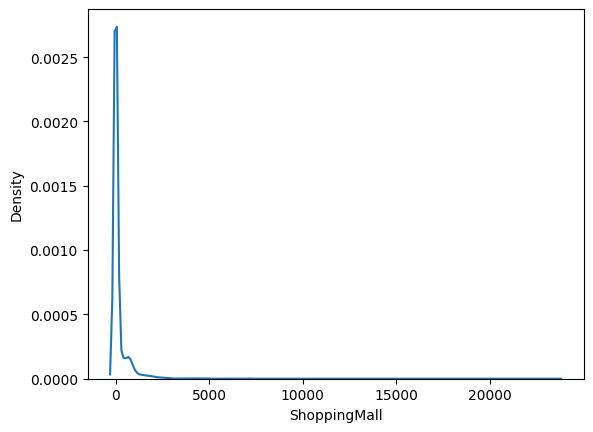

In [318]:
sns.kdeplot(df['ShoppingMall'])
plt.show()

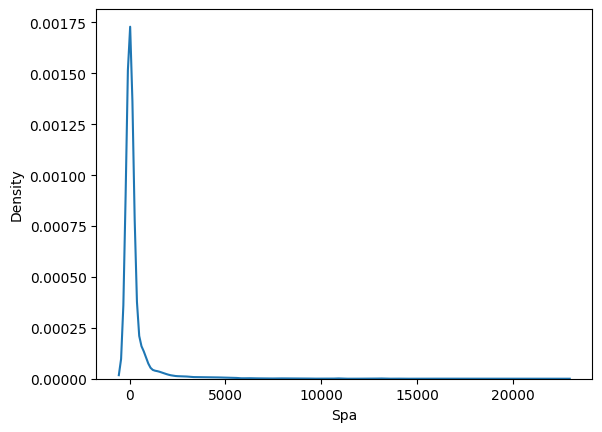

In [319]:
sns.kdeplot(df['Spa'])
plt.show()

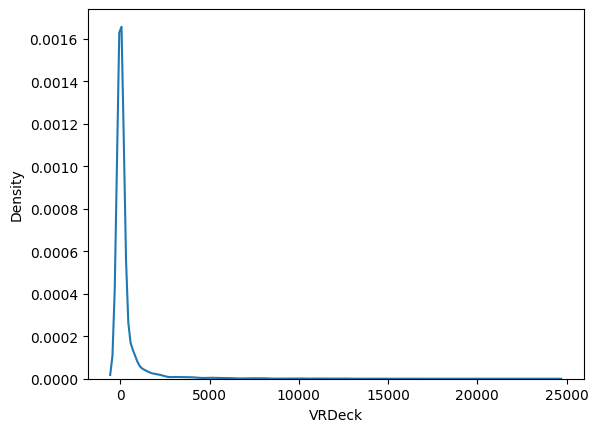

In [320]:
sns.kdeplot(df['VRDeck'])
plt.show()

checking outlier of numeric features

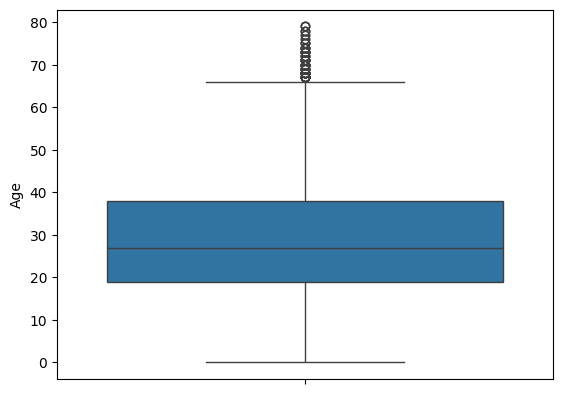

In [321]:
sns.boxplot(df['Age'])
plt.show()

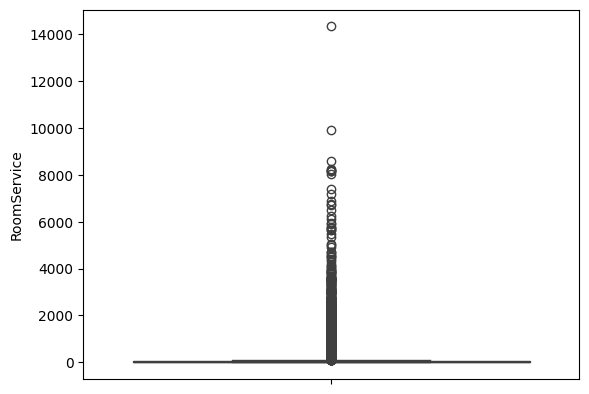

In [322]:
sns.boxplot(df['RoomService'])
plt.show()

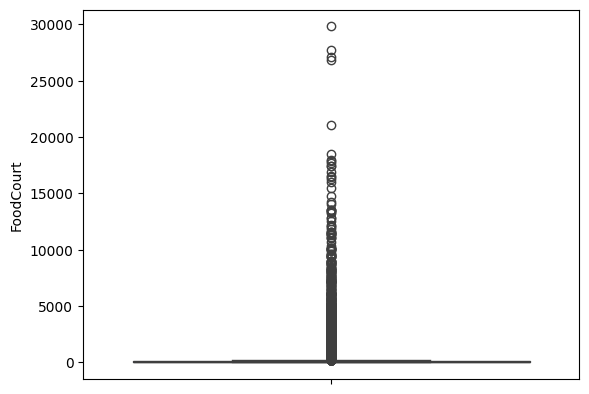

In [323]:
sns.boxplot(df['FoodCourt'])
plt.show()

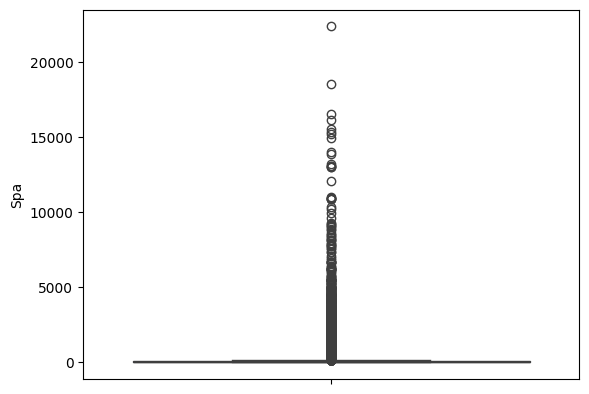

In [324]:
sns.boxplot(df['Spa'])
plt.show()

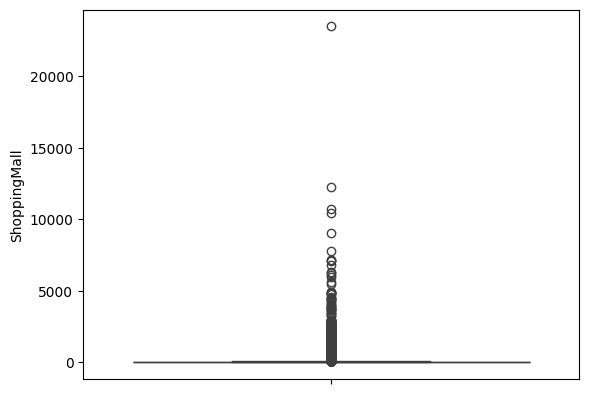

In [325]:
sns.boxplot(df['ShoppingMall'])
plt.show()

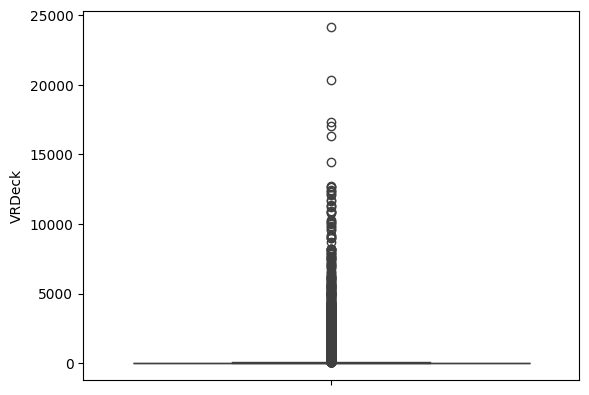

In [326]:
sns.boxplot(df['VRDeck'])
plt.show()

In [327]:
df['log_RoomService']=np.log(df['RoomService']+1)
print(df['log_RoomService'])

0       0.000000
1       4.700480
2       3.784190
3       0.000000
4       5.717028
          ...   
8688    0.000000
8689    0.000000
8690    0.000000
8691    0.000000
8692    4.844187
Name: log_RoomService, Length: 8693, dtype: float64


In [328]:
df['log_FoodCourt']=np.log(df['FoodCourt']+1)
print(df['log_FoodCourt'])

0       0.000000
1       2.302585
2       8.182280
3       7.157735
4       4.262680
          ...   
8688    8.827615
8689    0.000000
8690    0.000000
8691    6.956545
8692    8.452975
Name: log_FoodCourt, Length: 8693, dtype: float64


In [329]:
df['log_Spa']=np.log(df['Spa']+1)
print(df['log_Spa'])

0       0.000000
1       6.309918
2       8.812248
3       8.110728
4       6.338594
          ...   
8688    7.404888
8689    0.000000
8690    0.693147
8691    5.869297
8692    0.000000
Name: log_Spa, Length: 8693, dtype: float64


In [330]:
df['log_ShoppingMall']=np.log(df['ShoppingMall']+1)
print(df['log_ShoppingMall'])

0       0.000000
1       3.258097
2       0.000000
3       5.918894
4       5.023881
          ...   
8688    0.000000
8689    0.000000
8690    7.535297
8691    0.000000
8692    0.000000
Name: log_ShoppingMall, Length: 8693, dtype: float64


In [331]:
df['log_VRDeck']=np.log(df['VRDeck']+1)
print(df['log_VRDeck'])

0       0.000000
1       3.806662
2       3.912023
3       5.267858
4       1.098612
          ...   
8688    4.317488
8689    0.000000
8690    0.000000
8691    8.082093
8692    2.564949
Name: log_VRDeck, Length: 8693, dtype: float64


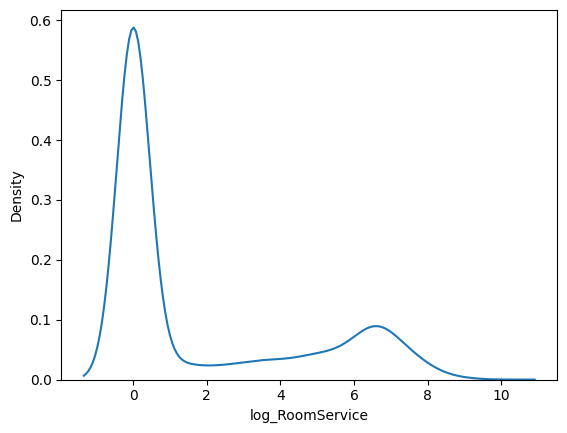

In [332]:
sns.kdeplot(df['log_RoomService'])
plt.show()

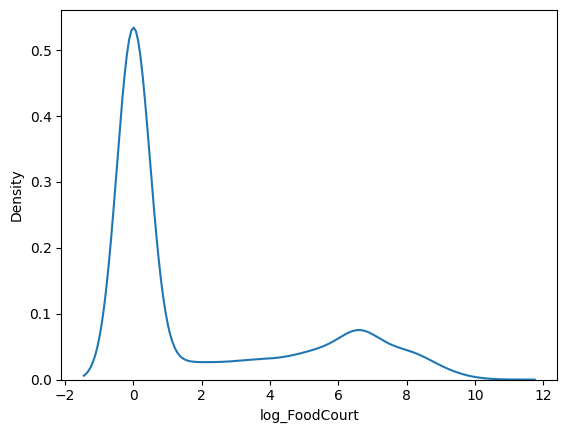

In [333]:
sns.kdeplot(df['log_FoodCourt'])
plt.show()

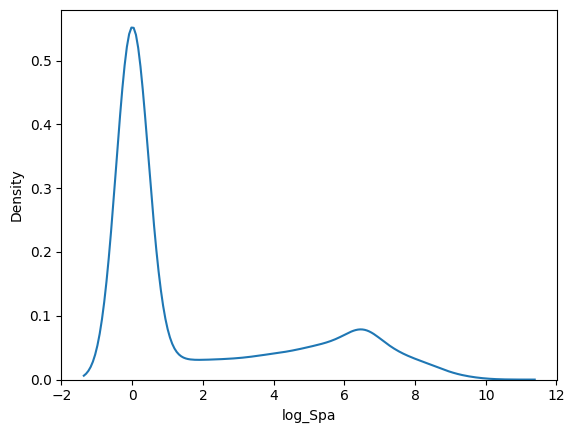

In [334]:
sns.kdeplot(df['log_Spa'])
plt.show()

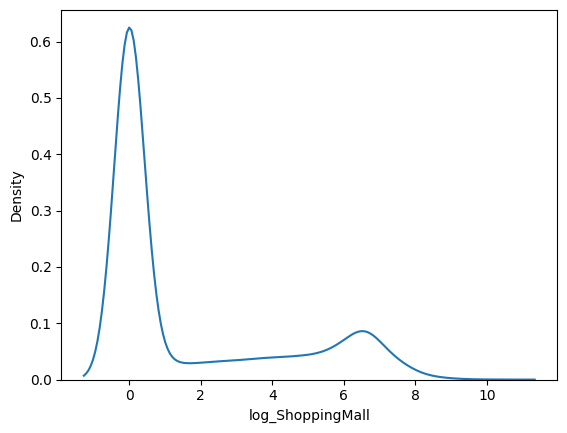

In [335]:
sns.kdeplot(df['log_ShoppingMall'])
plt.show()

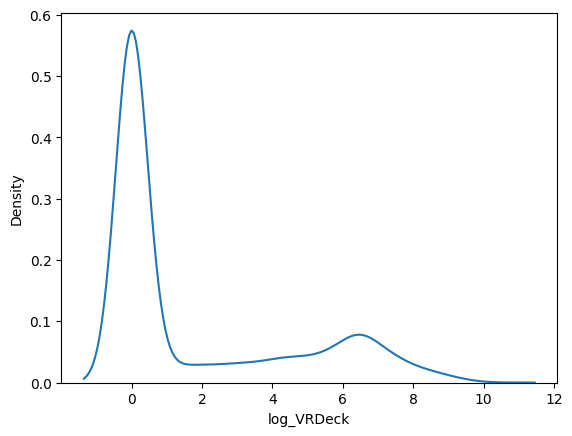

In [336]:
sns.kdeplot(df['log_VRDeck'])
plt.show()

In [337]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,4.700480,2.302585,6.309918,3.258097,3.806662
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.784190,8.182280,8.812248,0.000000,3.912023
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.000000,7.157735,8.110728,5.918894,5.267858
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5.717028,4.262680,6.338594,5.023881,1.098612


In [338]:
df.drop(['RoomService','FoodCourt','Spa','ShoppingMall','VRDeck'],axis=1,inplace=True)

In [339]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,4.700480,2.302585,6.309918,3.258097,3.806662
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,3.784190,8.182280,8.812248,0.000000,3.912023
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,0.000000,7.157735,8.110728,5.918894,5.267858
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,5.717028,4.262680,6.338594,5.023881,1.098612


In [340]:
df.drop(columns=['Name','Cabin','PassengerId'],inplace=True)

In [341]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,Earth,False,TRAPPIST-1e,24.0,False,True,4.700480,2.302585,6.309918,3.258097,3.806662
2,Europa,False,TRAPPIST-1e,58.0,True,False,3.784190,8.182280,8.812248,0.000000,3.912023
3,Europa,False,TRAPPIST-1e,33.0,False,False,0.000000,7.157735,8.110728,5.918894,5.267858
4,Earth,False,TRAPPIST-1e,16.0,False,True,5.717028,4.262680,6.338594,5.023881,1.098612


In [342]:
df.isnull().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
Transported,0
log_RoomService,181
log_FoodCourt,183
log_Spa,183
log_ShoppingMall,208


In [343]:
df.dropna(inplace=True)

In [344]:
x=df[['HomePlanet',	'CryoSleep',	'Destination',	'Age',	'VIP','log_RoomService',	'log_FoodCourt',	'log_Spa',	'log_ShoppingMall',	'log_VRDeck']]

In [345]:
y=df['Transported']

In [346]:
print(x)

     HomePlanet CryoSleep    Destination   Age    VIP  log_RoomService  \
0        Europa     False    TRAPPIST-1e  39.0  False         0.000000   
1         Earth     False    TRAPPIST-1e  24.0  False         4.700480   
2        Europa     False    TRAPPIST-1e  58.0   True         3.784190   
3        Europa     False    TRAPPIST-1e  33.0  False         0.000000   
4         Earth     False    TRAPPIST-1e  16.0  False         5.717028   
...         ...       ...            ...   ...    ...              ...   
8688     Europa     False    55 Cancri e  41.0   True         0.000000   
8689      Earth      True  PSO J318.5-22  18.0  False         0.000000   
8690      Earth     False    TRAPPIST-1e  26.0  False         0.000000   
8691     Europa     False    55 Cancri e  32.0  False         0.000000   
8692     Europa     False    TRAPPIST-1e  44.0  False         4.844187   

      log_FoodCourt   log_Spa  log_ShoppingMall  log_VRDeck  
0          0.000000  0.000000          0.000000  

In [347]:
y

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [348]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [349]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['HomePlanet', 'CryoSleep',  'Destination']),('scale',StandardScaler(),['Age'])],remainder='passthrough')

In [350]:
x_train_trasnformed=ct.fit_transform(x_train)
x_test_transformed=ct.transform(x_test)

In [351]:
model=LogisticRegression(penalty='l1',solver='saga',C=2,max_iter=5000,class_weight='balanced')

In [352]:
model.fit(x_train_trasnformed,y_train)

LogisticRegression(C=2, class_weight='balanced', max_iter=5000, penalty='l1',
                   solver='saga')

In [353]:
y_pred=model.predict(x_test_transformed)

In [354]:
accuracy_score(y_test,y_pred)

0.7812274368231047

In [355]:
precision_score(y_test,y_pred)

0.7820689655172414

In [356]:
confusion_matrix(y_test,y_pred)

array([[515, 158],
       [145, 567]])

now making outcome for test set

In [414]:
df2=pd.read_csv('/content/test (2).csv')

In [415]:
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [418]:
df2['log_RoomService']=np.log(df2['RoomService']+1)
df2['log_FoodCourt']=np.log(df2['FoodCourt']+1)
df2['log_Spa']=np.log(df2['Spa']+1)
df2['log_ShoppingMall']=np.log(df2['ShoppingMall']+1)
df2['log_VRDeck']=np.log(df2['VRDeck']+1)

In [419]:
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.000000,0.000000,0.000000,0.000000,0.000000
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.000000,2.302585,7.945910,0.000000,0.000000
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.000000,0.000000,0.000000,0.000000,0.000000
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.000000,8.802823,5.204007,0.000000,6.373320
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,2.397895,0.000000,0.000000,6.455199,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.000000,0.000000,0.000000,0.000000,0.000000
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0.000000,6.742881,2.397895,2.890372,4.976734
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.000000,0.000000,0.000000,0.000000,0.000000
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0.000000,7.893945,0.000000,0.000000,6.261492


In [420]:
df2.drop(['RoomService','FoodCourt','Spa','ShoppingMall','VRDeck'],axis=1,inplace=True)

In [421]:
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,Nelly Carsoning,0.000000,0.000000,0.000000,0.000000,0.000000
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,Lerome Peckers,0.000000,2.302585,7.945910,0.000000,0.000000
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,Sabih Unhearfus,0.000000,0.000000,0.000000,0.000000,0.000000
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,Meratz Caltilter,0.000000,8.802823,5.204007,0.000000,6.373320
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,Brence Harperez,2.397895,0.000000,0.000000,6.455199,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,Jeron Peter,0.000000,0.000000,0.000000,0.000000,0.000000
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,Matty Scheron,0.000000,6.742881,2.397895,2.890372,4.976734
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,Jayrin Pore,0.000000,0.000000,0.000000,0.000000,0.000000
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,Kitakan Conale,0.000000,7.893945,0.000000,0.000000,6.261492


In [422]:
df2.drop(columns=['Name','Cabin'],inplace=True)

In [423]:
df2

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.000000,2.302585,7.945910,0.000000,0.000000
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.000000,8.802823,5.204007,0.000000,6.373320
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,2.397895,0.000000,0.000000,6.455199,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.000000,6.742881,2.397895,2.890372,4.976734
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.000000,0.000000,0.000000,0.000000,0.000000
4275,9273_01,Europa,False,NaN,NaN,False,0.000000,7.893945,0.000000,0.000000,6.261492


In [424]:
df2.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Destination,92
Age,91
VIP,93
log_RoomService,82
log_FoodCourt,106
log_Spa,101
log_ShoppingMall,98


In [446]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in cat_cols:
    df2[col] = df2[col].fillna(df2[col].mode()[0])
spend_cols = [
    'log_RoomService',
    'log_FoodCourt',
    'log_Spa',
    'log_ShoppingMall',
    'log_VRDeck'
]

df2[spend_cols] = df2[spend_cols].fillna(0)



In [447]:
PassengerId2=df2['PassengerId']
print(PassengerId2)

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object


In [448]:
df2.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
log_RoomService,0
log_FoodCourt,0
log_Spa,0
log_ShoppingMall,0


In [449]:
x2=df2[['HomePlanet',	'CryoSleep',	'Destination',	'Age',	'VIP','log_RoomService',	'log_FoodCourt',	'log_Spa',	'log_ShoppingMall',	'log_VRDeck']]

In [450]:
x2

,HomePlanet,CryoSleep,Destination,Age,VIP,log_RoomService,log_FoodCourt,log_Spa,log_ShoppingMall,log_VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
1,Earth,False,TRAPPIST-1e,19.0,False,0.000000,2.302585,7.945910,0.000000,0.000000
2,Europa,True,55 Cancri e,31.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
3,Europa,False,TRAPPIST-1e,38.0,False,0.000000,8.802823,5.204007,0.000000,6.373320
4,Earth,False,TRAPPIST-1e,20.0,False,2.397895,0.000000,0.000000,6.455199,0.000000
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
4273,Earth,False,TRAPPIST-1e,42.0,False,0.000000,6.742881,2.397895,2.890372,4.976734
4274,Mars,True,55 Cancri e,26.0,False,0.000000,0.000000,0.000000,0.000000,0.000000
4275,Europa,False,TRAPPIST-1e,26.0,False,0.000000,7.893945,0.000000,0.000000,6.261492


In [451]:
ct2 = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['HomePlanet', 'CryoSleep',  'Destination']),('scale',StandardScaler(),['Age'])],remainder='passthrough')


In [452]:
x_transs=ct2.fit_transform(x2)

In [453]:
y_pred2=model.predict(x_transs)

In [454]:

submission = pd.DataFrame({
    'PassengerId': PassengerId2,
    'Transported': y_pred2
})

print(submission.head())


  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01        False
4     0023_01         True


In [457]:
submission.to_csv('submission2.csv', index=False)
